# Assignment 3

<h2>Group 19</h2>

Nicolò Bruna 03755518<br>
Bogac Ünver 03714949<br>
Michael Lemanov 03766090<br> 
Gamze Naz Kiprit 03692541<br> 
Konstantinos Larintzakis 03716459<br> 
Volkan Arsan 03709328<br> 
Ivan Nikolovski 03717921<br> 
Karahan Yilmazer 03717524

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import imageio.v2 as imageio
import matplotlib.cm as cm
import matplotlib.patches as mpatches

In [4]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S

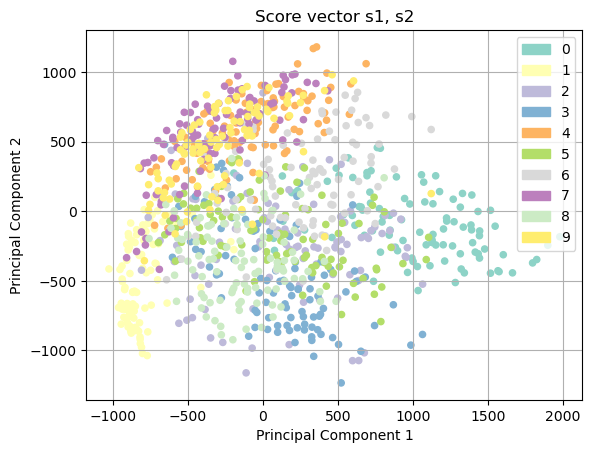

In [5]:
N=100
num_digits = 10
digits= ['d%d' % i for i in range(num_digits)]
X=np.zeros((784,num_digits*N))
C=np.zeros((num_digits*N,4))
color_map=cm.get_cmap('Set3',10)
colors = color_map(np.linspace(0, 1, num_digits))

for i,dp in enumerate(digits):
    C[i*N:(i+1)*N, :] = np.expand_dims(colors[i],axis=0)
    for j in range(N):
        X[:,i*N+j]=np.float64(imageio.imread('./mnist/'+dp+'/'+dp+'_'+'%04d.png'%(j+1)).ravel())
        
k = 2
S_test = linear_pca(X, k)

plt.scatter(S_test.T[:,0], S_test.T[:,1], c=C, s=20)
plt.grid()
plt.title('Score vector s1, s2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
legend_patch = [mpatches.Patch(color=colors[i], label=str(i)) for i in range(0, num_digits)]
plt.legend(handles=legend_patch)
plt.show()


In [6]:
def gram_pca(K,k):
    # Center the the Kernel Matrik K
    n = K.shape[1]
    H = np.eye(n) - (1/n)*np.ones((n,1))@np.ones((n,1)).T
    K = H@K@H
    
    # Compute the EVD of K
    Eig,Vec = np.linalg.eig(K)
    idx = np.argsort(-Eig)
    for i in range(len(Eig)):
        if abs(Eig[i]) < 1e-9:
            Eig[i] = 0
    Eig = Eig[idx]
    Vec = Vec[:,idx]
    
    Sigma_k = np.sqrt(Eig)
    V_k = Vec
    
    S = np.expand_dims(Sigma_k[:k],axis=1)*V_k.T[:k,:]
    
    
    return S

C:\Users\User\anaconda3\lib\site-packages\matplotlib\collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


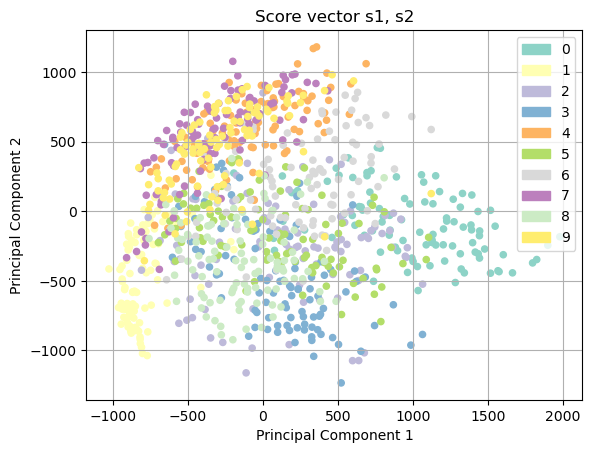

In [7]:
k = 2
K = np.dot(X.T,X)
S_test_1 = gram_pca(K, k)

plt.scatter(S_test_1.T[:,0], S_test_1.T[:,1], c=C, s=20)
plt.grid()
plt.title('Score vector s1, s2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
legend_patch = [mpatches.Patch(color=colors[i], label=str(i)) for i in range(0, num_digits)]
plt.legend(handles=legend_patch)
plt.show()


As we can see from the plots the result for gram_pca and linear_pca is the same since the relationship between the 2 principal components is the same. If we multiply V_k in the in the definition of the gram_pca function with -1, which is still a valid basis, we will get the same plot.

In [8]:
def compute_gaussian_gram_matrix(X, sigma):
    # Create matrix for ||x_i - x_j||^2 = x_i^T*x_i -2*x_i^T*x_j + x_j^T*x_j -> A -2*B +C
    B = np.dot(X.T,X)
    A = np.expand_dims(np.diag(B), axis=1)
    C = np.expand_dims(np.diag(B), axis=0)
    absv = A -2*B +C
    
    K = np.exp((-1/(2*sigma**2))*absv)
        
    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

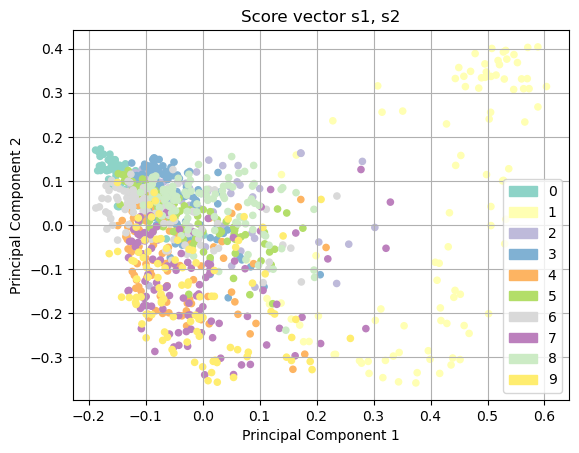

In [9]:
k = 2
sigma = 1000
S_test_2 = gaussian_kernel_pca(X, k, sigma)

plt.scatter(S_test_2.T[:,0], S_test_2.T[:,1], c=C, s=20)
plt.grid()
plt.title('Score vector s1, s2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
legend_patch = [mpatches.Patch(color=colors[i], label=str(i)) for i in range(0, num_digits)]
plt.legend(handles=legend_patch)
plt.show()